# LAB_Seaborn

## **Import data and libraries**

In this Lab we will use a restaurant dataset. 

The dataset contains tips data from different customers females and males, smokers and non smokers, from days, dinner or lunch and from different table size.

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv('data\\restaurant.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Question 1 (10 pts) 
What is the distribution of total bill? 
- Draw a **histogram** of total bill and answer the question.



<AxesSubplot: xlabel='total_bill', ylabel='Count'>

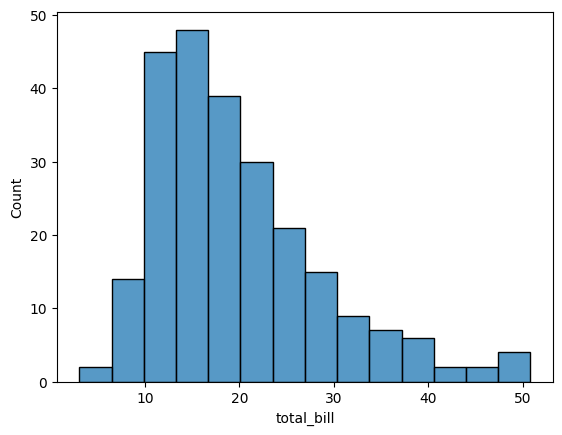

In [11]:
#YOUR CODE HERE
sns.histplot(x = df['total_bill'])

### Question 2 (10 pts) 
- Visualize the distribution of the **tip** with the help of a **boxplot**

<AxesSubplot: xlabel='tip'>

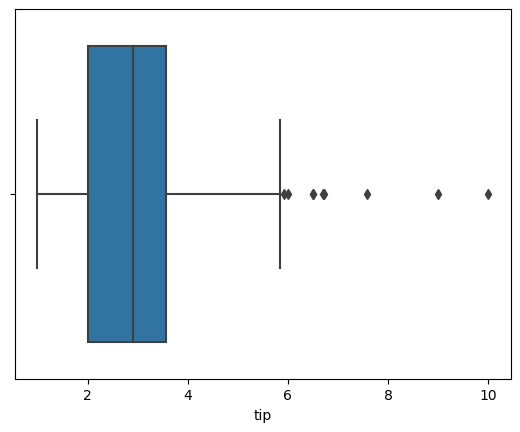

In [10]:
#YOUR CODE HERE
sns.boxplot(x = df.tip)

**Question:** What value does the **line** inside the box in boxplot represent?

- A. Mean

- B. Mode

- C. Median

- D. None of the above 

In [ ]:
#Your answer here:
# => Correct answer is: C

**Question:** In boxplot, what is the distance from Q1 to Q3 called?
- A. Quartile range
- B. Median range
- C. Interquartile range
- D. Medium range

In [ ]:
#Your answer here: C


### Question 3 (10 pts)  

**Question** Female or Male: Which one pays **more often**? 
- Draw a **countplot** and answer the question.

<AxesSubplot: xlabel='sex', ylabel='count'>

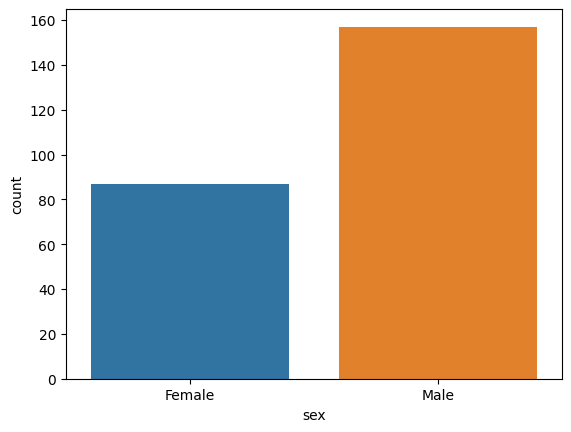

In [9]:
sns.countplot(x = df['sex'])

# ==> Male pay more often

**Question:** What is the **difference** between a Histogram and a Countplot?

- A. Countplot is used for categorical column, not continuous like Histogram.

- B. Countplot shows the relationship between 2 variables.

- C. Countplot provides the option to change color.

- D. Countplot shows the statistics of the variable.

In [ ]:
# Your answer here: A


### Question 4 (10 pts)
Among the week, which day has more **number of bills**? 
- Visualize with a **countplot**.

<AxesSubplot: xlabel='day', ylabel='count'>

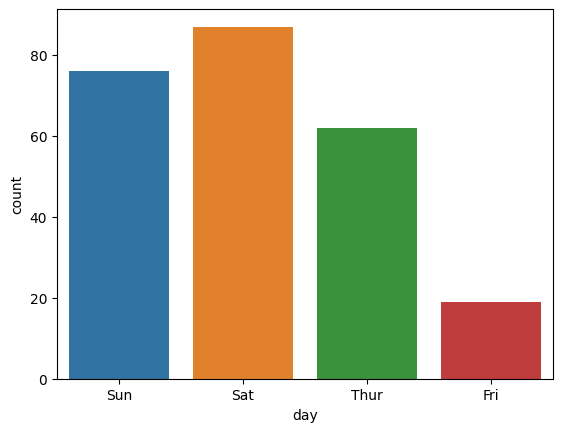

In [13]:
#YOUR CODE HERE
sns.countplot(x = df.day)


**Question**: Which day has most **number of bills**

- A. Thur
- B. Fri
- C. Sat
- D. Sun

In [ ]:
# Your answer here: C


### Question 5 (10 pts) 
Smoke or Non-smoke, which type of seat is more in demand? 
- Visualize with a **countplot**.

<AxesSubplot: xlabel='smoker', ylabel='count'>

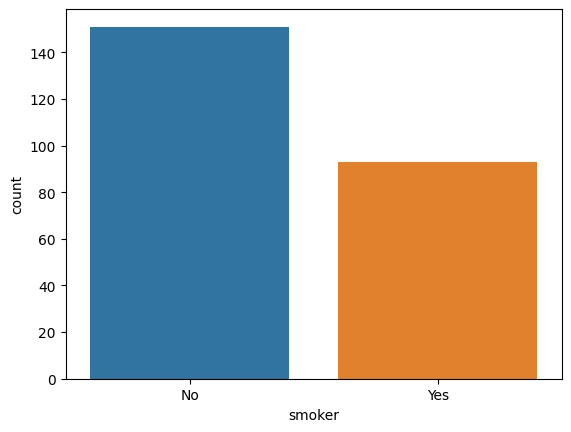

In [15]:
#YOUR CODE HERE
sns.countplot(x = df['smoker'])

**Question**: Which type of seat is more in demand ? (Interm of number)
- A. Non-Smoker
- B. Smoker

In [ ]:
# Your answer here: A

### Question 6 (10 pts) Average total_bill by day

<AxesSubplot: xlabel='day', ylabel='total_bill'>

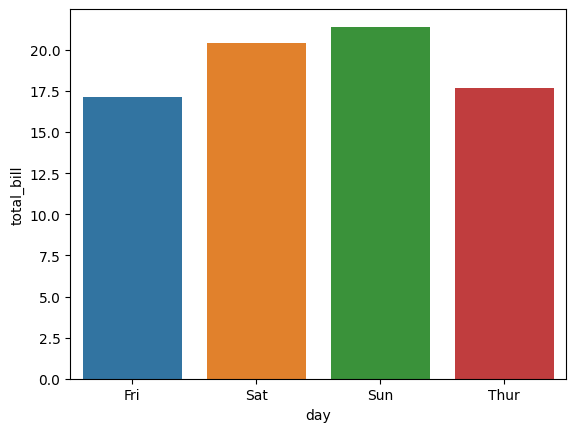

In [16]:
plot_data = df.groupby('day').mean()['total_bill'].reset_index()
sns.barplot(data=plot_data,
            x="day",
            y="total_bill")

**Question**: The above chart x_axis isn't sorted in the right order. How can we sort it?

- A. Sort in the source dataframe

- B. Sort in `seaborn` using `order`

- C. None of the above

- D. A & B are both correct.

In [8]:
# Your answer here: D


### Question 7 (10 pts)
**Exercise**: The above chart isn't sorted by day. 
- Find a way to **sort the bars** in two ways if you can. 

##### Option 1: Sort by using attribute: "order"

<AxesSubplot: xlabel='day', ylabel='total_bill'>

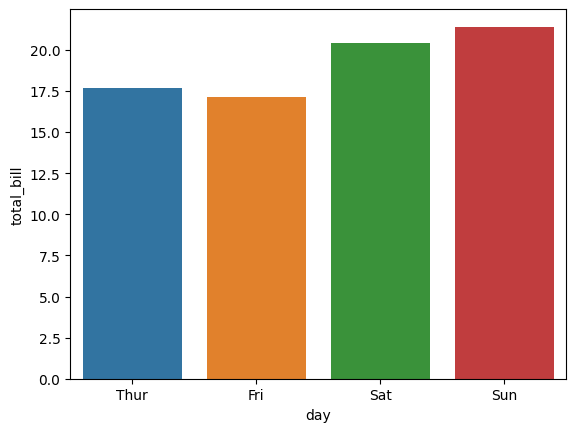

In [17]:
# Option 1: Sort by using attribute: "order"
plot_data = df.groupby('day').mean()['total_bill'].reset_index()
sns.barplot(data=plot_data,
            x="day",
            y="total_bill",
            order= ['Thur', 'Fri', 'Sat', 'Sun'])

##### Option 2: Sort right in plot dataframe:

In [18]:
# Option 2: Sort right in plot dataframe:
# Steps: Choose "day" column as index --> Using .loc to sort index --> Reset index
plot_data

,day,total_bill
0,Fri,17.151579
1,Sat,20.441379
2,Sun,21.410000
3,Thur,17.682742


In [19]:
# Step1: Choose "day" column as index 
plot_data.set_index('day', inplace=True)
plot_data

,total_bill
day,
Fri,17.151579
Sat,20.441379
Sun,21.410000
Thur,17.682742


In [23]:
# Step2: Using .loc to sort index
plot_data = plot_data.loc[['Thur', 'Fri', 'Sat', 'Sun']]
plot_data

,total_bill
day,
Thur,17.682742
Fri,17.151579
Sat,20.441379
Sun,21.410000


In [24]:
# Step3: Reset index
plot_data = plot_data.reset_index()
plot_data

,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


<AxesSubplot: xlabel='day', ylabel='total_bill'>

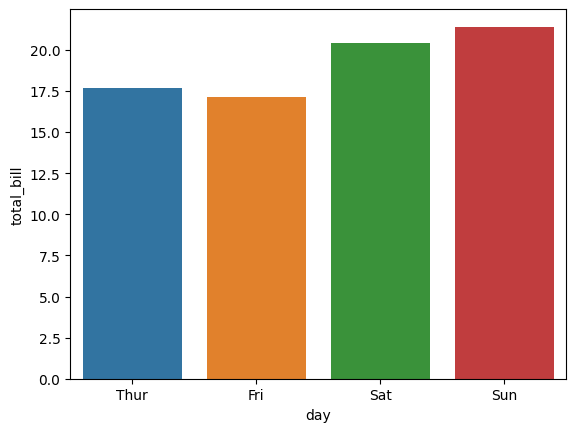

In [25]:
# Final step: plot it!
sns.barplot(data=plot_data,
            x="day",
            y="total_bill")

🙋🏻‍♂️ **Tips**: ```order```

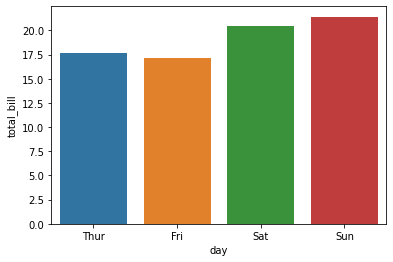

In [ ]:
#@title **Output should look like this** 

### Question 8 (10 pts)
- Visualize the **average of total_bill** by male and female in different days.

In [26]:
# your code here
dfplot = df.groupby(['day', 'sex'])['total_bill'].mean().reset_index()
dfplot

,day,sex,total_bill
0,Fri,Female,14.145556
1,Fri,Male,19.857000
2,Sat,Female,19.680357
3,Sat,Male,20.802542
4,Sun,Female,19.872222
5,Sun,Male,21.887241
6,Thur,Female,16.715312
7,Thur,Male,18.714667


<AxesSubplot: xlabel='day', ylabel='total_bill'>

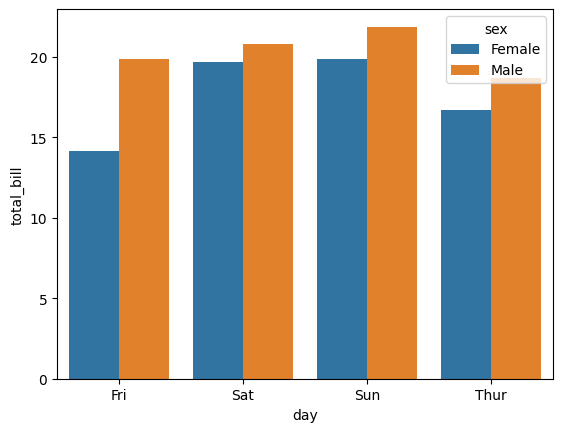

In [27]:
sns.barplot(
    data = dfplot,
    x = 'day',
    y = 'total_bill',
    hue = 'sex'
)

🙋🏻‍♂️ **Tips**: ```hue```

### Question 9 (10 pts)
How is the **total bills** in lunch and dinner change throughout the week? 

Draw a **group bar chart** to help answer the question .

In [28]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot: xlabel='day', ylabel='total_bill'>

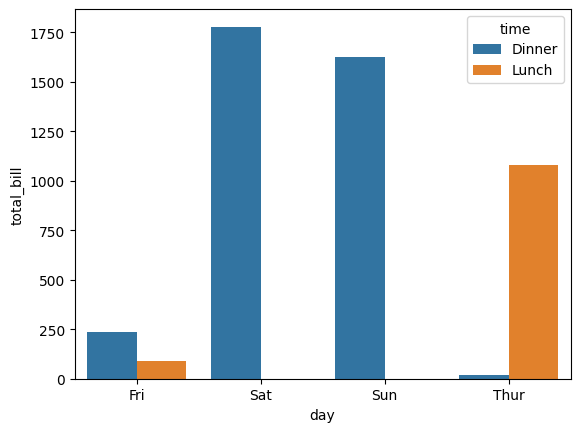

In [29]:
#Hint

#Group the data by Day and Time

plot_df = df.groupby(['day', 'time'])['total_bill'].sum().reset_index()

#Then Draw a barplot with the plot_df with the help of HUE

sns.barplot(data=plot_df, x = 'day', y = 'total_bill', hue = 'time')

**Question**: When is the **peak** day for dinner and lunch ?

- A. **Dinner** peaks on **Sat**, **Lunch** peaks on **Sun**
- B. **Dinner** peaks on **Thur**, **Lunch** peaks on **Fri**
- C. **Dinner** peaks on **Fri**, **Lunch** peaks on **Sat**
- D. **Dinner** peaks on **Sat**, **Lunch** peaks on **Thur**

In [ ]:
# your answer here: D


### Question 10 (10 pts)
Is it true that the bigger the bill is, the bigger the tip is? 

Visualize with a **scatterplot**.

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

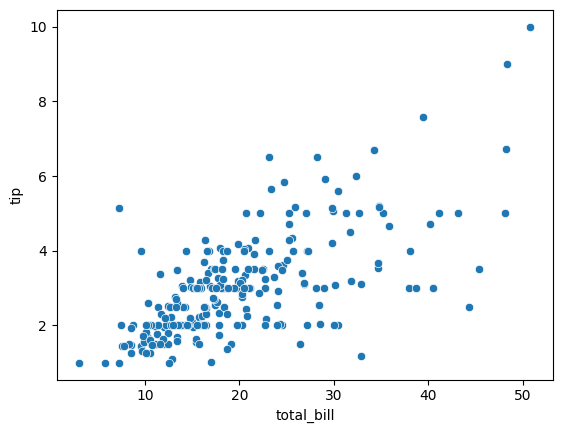

In [30]:
#YOUR CODE HERE 
sns.scatterplot(
    data = df,
    x = 'total_bill',
    y = 'tip'
)

**Question**: Does total bill and tips have a  **linear correlation** ?

**👉 Yessss! Bigger bill can lead to bigger tip**